In [1]:
import warnings
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
warnings.filterwarnings("ignore")

In [2]:
#validating tensorflow import
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.2.0


In [3]:
from tensorflow import keras

# Reading the data

In [23]:
#storing the details in the dataframe
        
from PIL import Image
import glob
path = './trafficsigns_dataset/*/*/*.png'




image_list = []
for filepath in glob.glob(path, recursive=True): 
    specific_type_label = filepath.split("/")[-2]
    shape_label = filepath.split("/")[-3]
    image_list.append((filepath, specific_type_label, shape_label))

# Create a data frame
image_df = pd.DataFrame(data=image_list, columns=['image_path', 'specific_type_label', 'shape_label'])
image_df.shape

(3699, 3)

# Data Exploration

### Randomly inspecting images

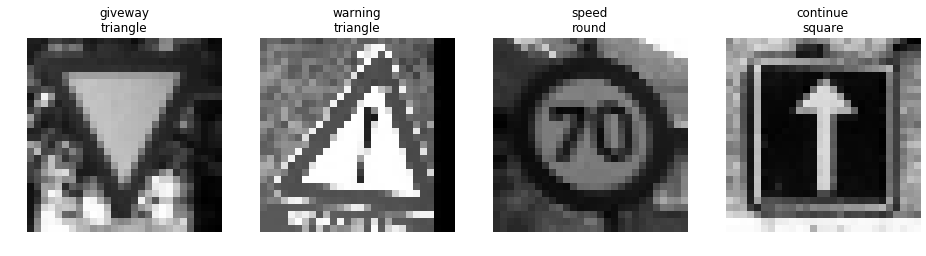

In [20]:
#randomly in inspecting loaded images with their labels

rand_data = image_df.sample(n=4, random_state=1682)
rand_data.reset_index(drop=True, inplace=True)

plt.figure(figsize=(16,4))
for i, row in rand_data.iterrows():
    im = np.asarray(Image.open(row.image_path))
    plt.subplot(1,4,i+1)
    plt.title(row.specific_type_label+"\n"+row.shape_label)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

In [6]:
#Checking the properites of the image
from random import randint
image = Image.open(image_df.loc[randint(1,3699),'image_path'])
print("Image Format :",image.format)
print("Image Mode :",image.mode)
print("Image Size :",image.size)

Image Format : PNG
Image Mode : L
Image Size : (28, 28)


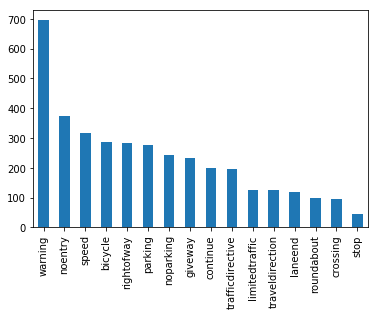

In [21]:
image_df['specific_type_label'].value_counts().plot(kind='bar')

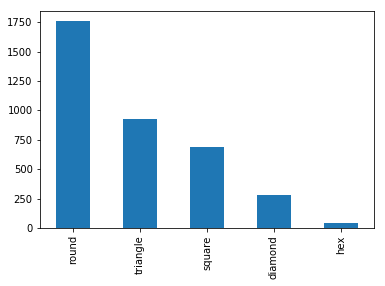

In [22]:
image_df['shape_label'].value_counts().plot(kind='bar')

## Splitting the data frame

In [9]:
# def get_split_details(split_data,label):
#     count = len(split_data)
#     proportion = round(len(shape_val)/len(image_df)*100)
#     grp = split_data.groupby([label]).nunique()
#     class_counts = {key: grp[key] for key in list(grp.keys())}
#     label_proportion = {val[0]: round(val[1]/len(split_data)*100) for val in class_counts.items()}
#     print("Count :",count)
#     print("Size : {}% of total dataset".format(proportion))
#     print("label ditribution in split: ",label_proportion)

#### Splitting for classifying Sign-type

In [14]:
from sklearn.model_selection import train_test_split

sign_train, sign_test, sign_train_label, sign_test_label = train_test_split(image_df['image_path'], image_df['specific_type_label'], test_size=0.2, stratify=image_df['specific_type_label'], random_state=33)

sign_train, sign_val, sign_train_label, sign_val_label = train_test_split(sign_train, sign_train_label, test_size=0.25, stratify=sign_train_label, random_state=1) # 0.25 x 0.8 = 0.2

print("For sign classification, splits are as below")
print("\nTraining data count: {} - size: {}%".format(len(sign_train),(round(len(sign_train)/len(image_df)*100))))
print("\nValidation data count: {} - size: {}%".format(len(sign_val),(round(len(sign_val)/len(image_df)*100))))
print("\nTesting data count: {} - size: {}%".format(len(sign_test),(round(len(sign_test)/len(image_df)*100))))

For sign classification, splits are as below

Training data count: 2219 - size: 60%

Validation data count: 740 - size: 20%

Testing data count: 740 - size: 20%


In [11]:
from sklearn.model_selection import train_test_split

shape_train, shape_test, shape_train_label, shape_test_label = train_test_split(image_df['image_path'], image_df['shape_label'], test_size=0.2, stratify=image_df['shape_label'], random_state=62)

shape_train, shape_val, shape_train_label, shape_val_label = train_test_split(shape_train, shape_train_label, test_size=0.25, stratify=shape_train_label, random_state=1) # 0.25 x 0.8 = 0.2

print("For shape classification, splits are as below")
print("\nTraining data count: {} - size: {}%".format(len(shape_train),(round(len(shape_train)/len(image_df)*100))))
print("\nValidation data count: {} - size: {}%".format(len(shape_val),(round(len(shape_val)/len(image_df)*100))))
print("\nTesting data count: {} - size: {}%".format(len(shape_test),(round(len(shape_test)/len(image_df)*100))))

For shape classification, splits are as below

Training data count: 2219 - size: 60%

Validation data count: 740 - size: 20%

Testing data count: 740 - size: 20%


## Storing the images in Keras dataframe

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_ds = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_ds = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=image_df,
        directory='./',
        x_col="image_path",
        y_col="specific_type_label",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory='./',
        x_col="image_path",
        y_col="shape_label",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')